##Challenge 1

In [46]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.mode.chained_assignment = None

headers = ['party', 'handicapped_infants', 'water_project_cost_sharing',
    'adoption_of_the_budget_resolution', 'physician_fee_freeze', 'el_salvador_aid',
    'religious_groups_in_schools', 'anti_satellite_test_ban', 'aid_to_nicaraguan_contras',
    'mx_missile', 'immigration', 'synfuels_corporation_cutback','education_spending',
    'superfund_right_to_sue', 'crime', 'duty_free_exports', 'export_administration_act_south_africa']

# read in data -- NOTE: has no headers
data = pd.read_csv("~/Desktop/metis/challenge_4/house-votes-84.csv", header=None,
    names=headers)

#change yes to 1, no to 0, ? to nan
data[data=='y'] = float(1)
data[data=='n'] = float(0)
data[data=='?'] = np.nan
#fill in nan with avg of column, then round to 0 or 1
new = data.ix[:, 'handicapped_infants':].apply(lambda x: x.fillna(x.mean()), axis=0)
new[new < .5] = float(0)
new[new >= .5] = float(1)
new['party'] = data['party']

##Challenge 2

In [47]:
def split_data(data):
    """
    @param -> data : pandas DataFrame
    @return -> train, test : split into 2 pandas DFs with NO HEADERS
    """
    train, test = train_test_split(data)
    train = pd.DataFrame(train)
    test = pd.DataFrame(test)
    return train, test

train, test = split_data(new)

##Challenge 3

In [48]:
#KNN
train_X = train.ix[:, :15]
train_y = train.ix[:, 16]
test_X = test.ix[:, :15]
test_y = test.ix[:, 16]


knn_3 = KNeighborsClassifier(n_neighbors=5)
knn_3.fit(train_X, train_y)
result = knn_3.predict(test_X)
#print accuracy_score(test_y, result)

#find best k where k = 1,...,20
def find_best_k(train_X, train_y, test_X, test_y):
    best_k_num = 0
    best_k_result = 0
    for i in xrange(1,21):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(train_X, train_y)
        result = knn.predict(test_X)
        accuracy = accuracy_score(test_y, result)
        if accuracy > best_k_result:
            best_k_result = accuracy
            best_k_num = i
    return 'k = ' + str(i) + ', ' + str(best_k_result)

print find_best_k(train_X, train_y, test_X, test_y)

k = 20, 0.935779816514


##Challenge 4

In [49]:
#use logistic regression to predict 
logit = LogisticRegression()
logit.fit(train_X, train_y)
result = logit.predict(test_X)
logit_accuracy = accuracy_score(test_y, result)
print logit_accuracy

0.94495412844


##Challenge 5

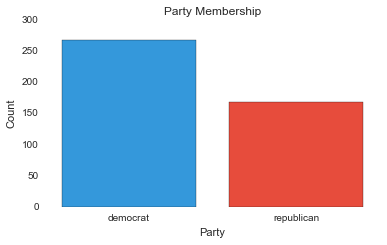

0.633027522936
0.366972477064


In [50]:
flatui = ["#3498db", "#e74c3c"]
sns.barplot(x=new['party'],dropna=True, palette=flatui)
sns.despine(left=True, right=True, bottom=True)
plt.title('Party Membership')
plt.xlabel('Party')
plt.ylabel('Count')
#plt.xticks(rotation = 60)
plt.gcf().subplots_adjust(bottom=0.25)
plt.show()

def fake_predict(X, fake_y):
    return [fake_y for x in range(len(X))]

fake_dems = fake_predict(test_X, "democrat")
fake_rep = fake_predict(test_X, "republican")

print accuracy_score(fake_dems, result)
print accuracy_score(fake_rep, result)

##Challenge 6

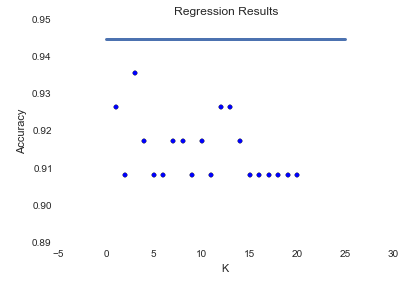

In [60]:
#plot accuracies
def find_all_k(train_X, train_y, test_X, test_y):
    k_nums = []
    k_results = []
    for i in xrange(1,21):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(train_X, train_y)
        result = knn.predict(test_X)
        accuracy = accuracy_score(test_y, result)
        k_nums.append(i)
        k_results.append(accuracy)
    return k_nums, k_results

k_nums, k_results = find_all_k(train_X, train_y, test_X, test_y)

plt.scatter(k_nums, k_results)
plt.title('Regression Results')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot([0,25], [logit_accuracy, logit_accuracy], label="Logistic Regression", lw=3)
plt.annotate('local max', xy=(.945, 20), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()
